In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]

# integrand function
def intergrand(alpha, u, theta):
    return (u - np.cos(theta - alpha))/(1 + u**2 - 2 * u * np.cos(theta - alpha))**(3/2)

# simple integration function
def integrate(a, b, N, f, u, theta):
    dx = (b - a)/N
    
    sum = 0
    
    for i in range(int(N)):
        x = a + dx * i
        sum += f(x, u, theta) * dx
    
    return sum

In [2]:
# integration resolution
N = int(1e2)
# model resolution
M = int(1e3)

# set up arrays for the position in polar co-ordinates and the field (both dimensionless)
u_arr = np.linspace(0, 2, M)
phi_arr = np.linspace(0, 2 * np.pi, M)
eta_arr = np.zeros((M, M))

In [3]:
# integrate across area
for i in range(len(u_arr)):
    if (i % 100 == 0):
        print('i = {}'.format(i))
    for j in range(len(phi_arr)):
        eta_arr[i][j] = integrate(0, 2 * np.pi, N, intergrand, u_arr[i], phi_arr[j])

i = 0
i = 100
i = 200
i = 300
i = 400
i = 500
i = 600
i = 700
i = 800
i = 900


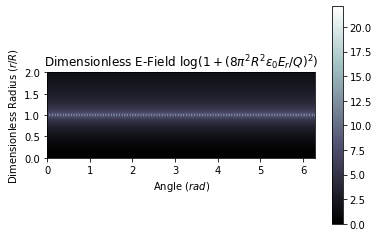

In [41]:
# plot result as a function of radial distance and angle
plt.imshow(np.log(1 + eta_arr**2), origin='lower', cmap='bone', 
           extent=[phi_arr.min(), phi_arr.max(), u_arr.min(), u_arr.max()], interpolation='none')
plt.colorbar()
plt.ylabel("Dimensionless Radius $(r/R)$")
plt.xlabel("Angle $(rad)$")
plt.title("Dimensionless E-Field $\log(1 + ( 8 \pi^2 R^2 \epsilon_0 E_r / Q )^2)$")
plt.savefig("Polar Plot of Planar E-Field of Circular Wire.png", dpi=300)

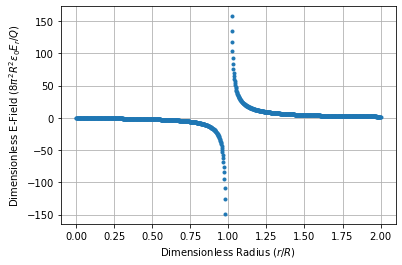

In [42]:
# let's plot the field as a function of the radial distance
# since there is angular symmetry
m = 10
plt.plot(np.concatenate((u_arr[:M//2 - m], u_arr[(M//2 + m):])), 
         np.concatenate((eta_arr[:(M//2 - m), 0], eta_arr[(M//2 + m):, 0])), '.')
plt.grid('on')
plt.xlabel("Dimensionless Radius $(r/R)$")
plt.ylabel("Dimensionless E-Field $(8 \pi^2 R^2 \epsilon_0 E_r / Q)$")
plt.savefig("Planar E-Field of Circular Wire vs Radial Distance.png", dpi=300)